## SMS Spam Classifier: Multinomial Naive Bayes

The notebook is divided into the following sections:
1. Importing and preprocessing data
2. Building the model: Multinomial Naive Bayes
    - Model building 
    - Model evaluation

### 1. Importing and Preprocessing Data

In [78]:
import pandas as pd

# reading the training data
docs = pd.read_csv('movie_review_train.csv')
docs.head()

,class,text
0,Pos,a common complaint amongst film critics is ...
1,Pos,whew this film oozes energy the kind of b...
2,Pos,steven spielberg s amistad which is bas...
3,Pos,he has spent his entire life in an awful litt...
4,Pos,being that it is a foreign language film with...


In [79]:
# reading the training data
test_docs = pd.read_csv('movie_review_test.csv')
test_docs.head()

,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...


In [80]:
# number of SMSes / documents
len(docs)

1600

In [81]:
# number of SMSes / documents
len(test_docs)

400

In [82]:
# counting spam and ham instances
ham_spam = docs['class'].value_counts()
ham_spam

Pos    800
Neg    800
Name: class, dtype: int64

In [83]:
# counting spam and ham instances
ham_spam = test_docs['class'].value_counts()
ham_spam

Neg    200
Pos    200
Name: class, dtype: int64

In [84]:
print("spam rate is about {0}%".format(
    round((ham_spam[1]/float(ham_spam[0]+ham_spam[1]))*100), 2))

spam rate is about 50.0%


In [85]:
# mapping labels to 0 and 1
docs['label'] = docs['class'].map({'Neg':0, 'Pos':1})

In [86]:
# mapping labels to 0 and 1
test_docs['label'] = test_docs['class'].map({'Neg':0, 'Pos':1})

In [87]:
docs.head()

,class,text,label
0,Pos,a common complaint amongst film critics is ...,1
1,Pos,whew this film oozes energy the kind of b...,1
2,Pos,steven spielberg s amistad which is bas...,1
3,Pos,he has spent his entire life in an awful litt...,1
4,Pos,being that it is a foreign language film with...,1


In [88]:
test_docs.head()

,class,text,label
0,Pos,films adapted from comic books have had plent...,1
1,Pos,every now and then a movie comes along from a...,1
2,Pos,you ve got mail works alot better than it des...,1
3,Pos,jaws is a rare film that grabs your atte...,1
4,Pos,moviemaking is a lot like being the general m...,1


In [89]:
# we can now drop the column 'Class'
docs = docs.drop('class', axis=1)
docs.head()

,text,label
0,a common complaint amongst film critics is ...,1
1,whew this film oozes energy the kind of b...,1
2,steven spielberg s amistad which is bas...,1
3,he has spent his entire life in an awful litt...,1
4,being that it is a foreign language film with...,1


In [90]:
# we can now drop the column 'Class'
test_docs = test_docs.drop('class', axis=1)
test_docs.head()

,text,label
0,films adapted from comic books have had plent...,1
1,every now and then a movie comes along from a...,1
2,you ve got mail works alot better than it des...,1
3,jaws is a rare film that grabs your atte...,1
4,moviemaking is a lot like being the general m...,1


In [91]:
# convert to X and y
X_train = docs.text
y_train = docs.label
print(X_train.shape)
print(y_train.shape)

(1600,)
(1600,)


In [92]:
# convert to X and y
X_test = test_docs.text
y_test = test_docs.label
print(X_test.shape)
print(y_test.shape)

(400,)
(400,)


In [93]:
# splitting into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [94]:
X_train.head()

1145     this movie about two dysfunctional families n...
73       felix   sami bouajila     the siege     lives...
446      vampire lore and legend has always been a pop...
399      kevin smith is like a big kid    his humor is...
647      bruce lee was a bigger than life martial arti...
Name: text, dtype: object

In [95]:
y_train.head()

1145    0
73      1
446     1
399     1
647     1
Name: label, dtype: int64

In [96]:
# vectorizing the sentences; removing stop words
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')

In [97]:
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [98]:
# printing the vocabulary
vect.vocabulary_

{'movie': 18546,
 'dysfunctional': 8768,
 'families': 10177,
 'really': 22761,
 'gets': 11728,
 'ground': 12343,
 'despite': 7542,
 'good': 12030,
 'performances': 20704,
 'basically': 2466,
 'competent': 5636,
 'cast': 4442,
 'eddie': 8868,
 'sean': 24854,
 'penn': 20645,
 'maureen': 17485,
 'robin': 23922,
 'wright': 31536,
 'happily': 12699,
 'married': 17322,
 'couple': 6336,
 'luck': 16831,
 'living': 16568,
 'rented': 23298,
 'rooms': 24044,
 'seedier': 24921,
 'unnamed': 29896,
 'city': 5089,
 'spend': 26480,
 'little': 16550,
 'income': 14176,
 'local': 16600,
 'bar': 2368,
 'owned': 20137,
 'shorty': 25433,
 'stanton': 26812,
 'best': 2843,
 'friend': 11243,
 'wife': 31212,
 'georgie': 11696,
 'mazar': 17510,
 'share': 25243,
 'odd': 19539,
 'relationship': 23156,
 'marked': 17291,
 'frequent': 11220,
 'disappearances': 7869,
 'return': 23608,
 'promises': 21985,
 'world': 31467,
 'professes': 21915,
 'undying': 29710,
 'love': 16773,
 'manic': 17182,
 'reunions': 23615,
 'soo

In [99]:
# vocab size
len(vect.vocabulary_.keys())

31849

In [100]:
newVect = CountVectorizer(stop_words='english', min_df=.03, max_df=.8) 
newVect.fit(X_train)

CountVectorizer(max_df=0.8, min_df=0.03, stop_words='english')

In [101]:
newVect.vocabulary_

{'movie': 940,
 'really': 1149,
 'gets': 608,
 'ground': 633,
 'despite': 360,
 'good': 622,
 'performances': 1031,
 'basically': 116,
 'cast': 199,
 'eddie': 428,
 'sean': 1236,
 'robin': 1195,
 'married': 880,
 'couple': 295,
 'luck': 862,
 'living': 840,
 'city': 235,
 'spend': 1329,
 'little': 837,
 'local': 842,
 'best': 130,
 'friend': 586,
 'wife': 1575,
 'share': 1268,
 'odd': 982,
 'relationship': 1160,
 'return': 1179,
 'world': 1604,
 'love': 856,
 'soon': 1313,
 'lead': 807,
 'new': 965,
 'like': 827,
 'high': 673,
 'reach': 1139,
 'wants': 1548,
 'baby': 108,
 'father': 518,
 'deep': 349,
 'sense': 1250,
 'leaves': 814,
 'badly': 111,
 'fear': 522,
 'lies': 823,
 'happens': 650,
 'come': 250,
 'result': 1177,
 'inevitable': 728,
 'ends': 447,
 'believes': 128,
 'months': 933,
 'reality': 1145,
 '10': 1,
 'years': 1619,
 'decade': 343,
 'solid': 1308,
 'individual': 726,
 'small': 1300,
 'role': 1198,
 'life': 824,
 'falls': 503,
 'apart': 67,
 'released': 1164,
 'comes': 2

In [102]:
# vocab size
len(newVect.vocabulary_.keys())

1624

In [103]:
# transforming the train and test datasets
X_train_transformed = newVect.transform(X_train)
X_test_transformed = newVect.transform(X_test)

In [104]:
# note that the type is transformed (sparse) matrix
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 1)	1
  (0, 67)	1
  (0, 108)	1
  (0, 111)	1
  (0, 116)	1
  (0, 128)	1
  (0, 130)	1
  (0, 168)	1
  (0, 199)	1
  (0, 226)	1
  (0, 235)	1
  (0, 250)	1
  (0, 254)	1
  (0, 286)	1
  (0, 295)	1
  (0, 332)	1
  (0, 343)	1
  (0, 349)	1
  (0, 360)	1
  (0, 428)	14
  (0, 447)	1
  (0, 503)	1
  (0, 518)	2
  (0, 522)	1
  (0, 586)	1
  :	:
  (1199, 1103)	1
  (1199, 1115)	1
  (1199, 1160)	1
  (1199, 1161)	1
  (1199, 1176)	1
  (1199, 1199)	1
  (1199, 1229)	1
  (1199, 1245)	1
  (1199, 1264)	1
  (1199, 1300)	1
  (1199, 1313)	2
  (1199, 1361)	1
  (1199, 1378)	3
  (1199, 1410)	1
  (1199, 1420)	1
  (1199, 1444)	1
  (1199, 1448)	1
  (1199, 1457)	1
  (1199, 1485)	1
  (1199, 1487)	1
  (1199, 1520)	1
  (1199, 1562)	1
  (1199, 1586)	1
  (1199, 1604)	2
  (1199, 1618)	1


In [105]:
X_test_transformed

<400x1624 sparse matrix of type '<class 'numpy.int64'>'
	with 54319 stored elements in Compressed Sparse Row format>

### 2. Building and Evaluating the Model

In [72]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = mnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba = mnb.predict_proba(X_test_transformed)


In [73]:
# note that alpha=1 is used by default for smoothing
mnb

MultinomialNB()

### Model Evaluation

In [74]:
# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.8275

In [75]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)
# help(metrics.confusion_matrix)

array([[172,  28],
       [ 41, 159]], dtype=int64)

In [76]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[172  28]
 [ 41 159]]


In [77]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.795


In [26]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.8186274509803921


In [27]:
precision = TP / float(TP + FP)
print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.815
0.815


In [28]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.815
PRECISION SCORE : 0.815
RECALL SCORE : 0.8316326530612245
F1 SCORE : 0.8232323232323232


In [29]:
y_pred_class

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,

In [30]:
y_pred_proba

array([[4.45408118e-22, 1.00000000e+00],
       [1.00000000e+00, 3.34207754e-10],
       [1.86856581e-06, 9.99998131e-01],
       [1.30409473e-01, 8.69590527e-01],
       [9.99957957e-01, 4.20428783e-05],
       [9.99994135e-01, 5.86539808e-06],
       [1.00000000e+00, 3.56876428e-19],
       [1.18739529e-26, 1.00000000e+00],
       [3.51546806e-04, 9.99648453e-01],
       [1.00000000e+00, 4.47291961e-12],
       [1.00000000e+00, 1.12860095e-21],
       [1.27549030e-20, 1.00000000e+00],
       [1.00000000e+00, 3.21590715e-15],
       [1.00000000e+00, 5.07905199e-72],
       [4.74777943e-08, 9.99999953e-01],
       [5.59492872e-01, 4.40507128e-01],
       [9.99999908e-01, 9.24765456e-08],
       [9.99993074e-01, 6.92591730e-06],
       [1.00000000e+00, 7.03695392e-14],
       [2.97820605e-57, 1.00000000e+00],
       [9.00720332e-15, 1.00000000e+00],
       [9.99880519e-01, 1.19481050e-04],
       [9.51099817e-07, 9.99999049e-01],
       [1.00000000e+00, 1.51397776e-12],
       [6.764111

In [31]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [32]:
# area under the curve
print (roc_auc)

0.8947829131652661


In [33]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,2.000000e+00,0.000000,0.000000
1,1.000000e+00,0.454082,0.049020
2,1.000000e+00,0.464286,0.049020
3,1.000000e+00,0.474490,0.049020
4,1.000000e+00,0.484694,0.049020
...,...,...,...
82,9.553986e-23,0.989796,0.833333
83,7.646669e-23,0.994898,0.833333
84,4.092430e-34,0.994898,0.960784
85,8.016768e-35,1.000000,0.960784


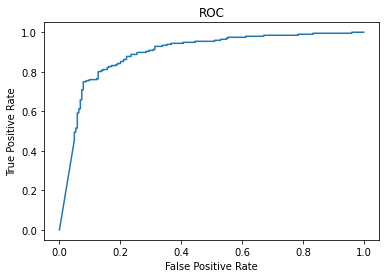

In [34]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)